<a href="https://colab.research.google.com/github/VoicuTomut/Compressed_Hartee-Foock/blob/master/CodeTasting/HelloOpenFermion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install openfermion openfermionpsi4 openfermioncirq pyscf openfermionpyscf

  Using cached https://files.pythonhosted.org/packages/d0/d4/5ca71c70918a6d0df6520f0e70648840f44af2409fc079dc0350316fa729/openfermioncirq-0.4.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/b0/d0/9858aa09bc330c31025be64c385881403cbe178c44bf6fb5880bd84b3639/pyscf-1.7.4-cp36-cp36m-manylinux1_x86_64.whl
    100% |████████████████████████████████| 1.6MB 6.9MB/s 
    100% |████████████████████████████████| 25.9MB 1.9MB/s 
    100% |████████████████████████████████| 2.9MB 12.4MB/s 
    100% |████████████████████████████████| 10.5MB 4.5MB/s 
  Using cached https://files.pythonhosted.org/packages/e0/1f/8cbbf698e853019ac3dc5d60ca8f6be4ace4542b2f05f7b62949617fc98e/sympy-1.6.2-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/02/c3/253a89ee03fc9b9682f1541728eb66db7db22148cd94f89ab22528cd1e1b/deprecation-2.1.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/1e/5b/6f8cb54ea8c0041ad9c8e4ece07cb5ca9eb1c29de68e68795b4a40d90cc6

In [2]:
# Psi4
# Set up a local conda environment for psi4
!wget https://repo.continuum.io/miniconda/Miniconda3-4.5.4-Linux-x86_64.sh
!bash Miniconda3-4.5.4-Linux-x86_64.sh -bfp /usr/local
# Append path to be able to run packages installed with conda
import sys
sys.path.append('/usr/local/lib/python3.6/site-packages')
# Install psi4 from Anaconda
!conda install -c psi4 psi4 -y

--2020-09-11 15:47:55--  https://repo.continuum.io/miniconda/Miniconda3-4.5.4-Linux-x86_64.sh
Resolving repo.continuum.io (repo.continuum.io)... 104.18.200.79, 104.18.201.79, 2606:4700::6812:c84f, ...
Connecting to repo.continuum.io (repo.continuum.io)|104.18.200.79|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://repo.anaconda.com/miniconda/Miniconda3-4.5.4-Linux-x86_64.sh [following]
--2020-09-11 15:47:55--  https://repo.anaconda.com/miniconda/Miniconda3-4.5.4-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58468498 (56M) [application/x-sh]
Saving to: ‘Miniconda3-4.5.4-Linux-x86_64.sh.2’

Miniconda3-4.5.4-Li 100%[===================>]  55.76M   131MB/s    in 0.4s    

2020-09-11 15:47:55 (131 MB/s) - ‘Miniconda3-4.5.4-Linux-x8

## Molecule specification and input generation 

In [3]:
import openfermion as of
from openfermion.hamiltonians import MolecularData

In [4]:
#H2

geometry=[['H',[0,0,0]],
          ['H',[0,0,0.74]]]

basis= 'sto-3g'
multiplicity=1
charge=0

h2_molecule=MolecularData(geometry,basis,multiplicity,charge)

In [5]:
print("nr. atoms: {},/n nr. elctrons: {}. ",h2_molecule.n_atoms,h2_molecule.protons)

for atom, atomic_number in zip(h2_molecule.atoms, h2_molecule.protons):
    print('atom {}: {} nr. protons.'.format(atom, atomic_number))

nr. atoms: {},/n nr. elctrons: {},  2 [1, 1]
atom H: 1 nr. protons.
atom H: 1 nr. protons.


## Integral generation


In [6]:
# OpenFermionPsi4
# Import opemfermionpsi4
import openfermionpsi4
from openfermionpsi4 import run_psi4

# OpenFermionPySCF
import openfermionpyscf as ofpyscf

In [7]:
# PySCF calculations

run_scf = 1
run_mp2 = 1
run_cisd = 0
run_ccsd = 0
run_fci = 1

h2_molecule = ofpyscf.run_pyscf(h2_molecule,
                    run_scf=run_scf,
                    run_mp2=run_mp2,
                    run_cisd=run_cisd,
                    run_ccsd=run_ccsd,
                    run_fci=run_fci)

In [8]:
one_electron_integrals = h2_molecule.one_body_integrals
two_electron_integrals = h2_molecule.two_body_integrals

In [9]:
print(one_electron_integrals)

[[-1.25330979e+00 -2.27668982e-16]
 [-1.98624663e-16 -4.75068849e-01]]


In [10]:
print(two_electron_integrals)

[[[[6.74755927e-01 1.42010673e-17]
   [1.02278901e-16 1.81210462e-01]]

  [[1.02278901e-16 1.81210462e-01]
   [6.63711401e-01 1.49957052e-16]]]


 [[[1.42010673e-17 6.63711401e-01]
   [1.81210462e-01 7.90885985e-17]]

  [[1.81210462e-01 7.90885985e-17]
   [1.49957052e-16 6.97651504e-01]]]]


## Hamiltonian

In [11]:
# InteractionOperator
hamiltonian = ofpyscf.generate_molecular_hamiltonian(geometry, basis, multiplicity, charge)

# Convert to a FermionOperator
hamiltonian_ferm_op = of.get_fermion_operator(hamiltonian)
print(hamiltonian_ferm_op)

0.7151043390810812 [] +
-1.2533097866459773 [0^ 0] +
0.3373779634072241 [0^ 0^ 0 0] +
0.09060523100759854 [0^ 0^ 2 2] +
0.3373779634072241 [0^ 1^ 1 0] +
0.09060523100759854 [0^ 1^ 3 2] +
0.09060523100759854 [0^ 2^ 0 2] +
0.3318557006754069 [0^ 2^ 2 0] +
0.09060523100759854 [0^ 3^ 1 2] +
0.3318557006754069 [0^ 3^ 3 0] +
0.3373779634072241 [1^ 0^ 0 1] +
0.09060523100759854 [1^ 0^ 2 3] +
-1.2533097866459773 [1^ 1] +
0.3373779634072241 [1^ 1^ 1 1] +
0.09060523100759854 [1^ 1^ 3 3] +
0.09060523100759854 [1^ 2^ 0 3] +
0.3318557006754069 [1^ 2^ 2 1] +
0.09060523100759854 [1^ 3^ 1 3] +
0.3318557006754069 [1^ 3^ 3 1] +
0.3318557006754069 [2^ 0^ 0 2] +
0.09060523100759854 [2^ 0^ 2 0] +
0.3318557006754069 [2^ 1^ 1 2] +
0.09060523100759854 [2^ 1^ 3 0] +
-0.47506884877217576 [2^ 2] +
0.09060523100759854 [2^ 2^ 0 0] +
0.348825752245232 [2^ 2^ 2 2] +
0.09060523100759854 [2^ 3^ 1 0] +
0.348825752245232 [2^ 3^ 3 2] +
0.3318557006754069 [3^ 0^ 0 3] +
0.09060523100759854 [3^ 0^ 2 1] +
0.3318557006754069 

In [12]:
import openfermion.transforms
from openfermion.transforms import get_fermion_operator, jordan_wigner, get_sparse_operator

In [13]:
h2_qubit_hamiltonian = jordan_wigner(get_fermion_operator(h2_molecule.get_molecular_hamiltonian())) #mapping

In [14]:
print(h2_qubit_hamiltonian)

(-0.0970662681676283+0j) [] +
(-0.04530261550379927+0j) [X0 X1 Y2 Y3] +
(0.04530261550379927+0j) [X0 Y1 Y2 X3] +
(0.04530261550379927+0j) [Y0 X1 X2 Y3] +
(-0.04530261550379927+0j) [Y0 Y1 X2 X3] +
(0.17141282644776895+0j) [Z0] +
(0.16868898170361205+0j) [Z0 Z1] +
(0.12062523483390417+0j) [Z0 Z2] +
(0.16592785033770344+0j) [Z0 Z3] +
(0.17141282644776898+0j) [Z1] +
(0.16592785033770344+0j) [Z1 Z2] +
(0.12062523483390417+0j) [Z1 Z3] +
(-0.22343153690813572+0j) [Z2] +
(0.174412876122616+0j) [Z2 Z3] +
(-0.22343153690813572+0j) [Z3]


## Energy calculation

In [16]:
import scipy.sparse

In [17]:
# Convert to Scipy sparse matrix
hamiltonian_jw_sparse = of.get_sparse_operator(h2_qubit_hamiltonian)

# Compute ground energy
eigs, _ = scipy.sparse.linalg.eigsh(hamiltonian_jw_sparse, k=1, which='SA')
ground_energy = eigs[0]

print('Ground_energy: {}'.format(ground_energy))

Ground_energy: -1.1372838344885028


## Bond lenght calculation

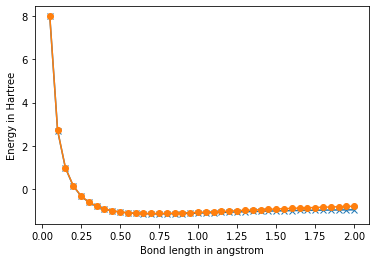

In [18]:
# Set molecule parameters.
basis = 'sto-3g'
multiplicity = 1
bond_length_interval = 0.05
n_points = 40

# Set calculation parameters.
run_scf = 1
run_mp2 = 1
run_cisd = 0
run_ccsd = 0
run_fci = 1
delete_input = True
delete_output = True

# Generate molecule at different bond lengths.
hf_energies = []
fci_energies = []
bond_lengths = []
for point in range(1, n_points + 1):
    bond_length = bond_length_interval * float(point)
    bond_lengths += [bond_length]
    geometry = [('H', (0., 0., 0.)), ('H', (0., 0., bond_length))]
    molecule = MolecularData(
        geometry, basis, multiplicity,
        description=str(round(bond_length, 2)))
    
    # Run pyscf.
    molecule = ofpyscf.run_pyscf(molecule,
                        run_scf=run_scf,
                        run_mp2=run_mp2,
                        run_cisd=run_cisd,
                        run_ccsd=run_ccsd,
                        run_fci=run_fci)
    hf_energies += [molecule.hf_energy]
    fci_energies += [molecule.fci_energy]

# Plot.
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(0)
plt.plot(bond_lengths, fci_energies, 'x-')
plt.plot(bond_lengths, hf_energies, 'o-')
plt.ylabel('Energy in Hartree')
plt.xlabel('Bond length in angstrom')
plt.show()


## Resources
<ul>
  <li>[Original](https://colab.research.google.com/drive/1Mh_gMkAWXlEK-jk1jPAPH-v-Zun7DJ2W#scrollTo=61RGlD_rhw5t)</li>
  <li>[Tutorial](https://colab.research.google.com/drive/1Mh_gMkAWXlEK-jk1jPAPH-v-Zun7DJ2W#scrollTo=babE3T61S-yd)</li>
  <li>[arXiv:1710.07629](https://arxiv.org/abs/1710.07629)</li>
</ul>